# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [ ]:
#q2.1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/ForeignGifts_edu.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28221 entries, 0 to 28220
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          28221 non-null  int64 
 1   OPEID                       28221 non-null  int64 
 2   Institution Name            28221 non-null  object
 3   City                        28221 non-null  object
 4   State                       28221 non-null  object
 5   Foreign Gift Received Date  28221 non-null  int64 
 6   Foreign Gift Amount         28221 non-null  int64 
 7   Gift Type                   28221 non-null  object
 8   Country of Giftor           28221 non-null  object
 9   Giftor Name                 24470 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


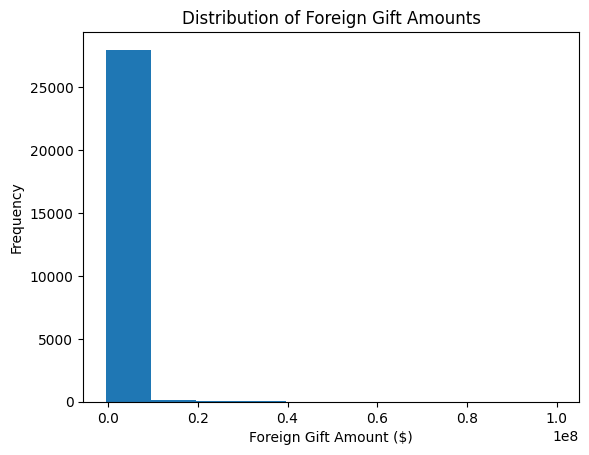

In [3]:
#q2.2
plt.hist(df['Foreign Gift Amount'])
plt.xlabel('Foreign Gift Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Foreign Gift Amounts')
plt.show()

Looks like most foreign gift amounts are very small, with a very small number of very large gifts. 

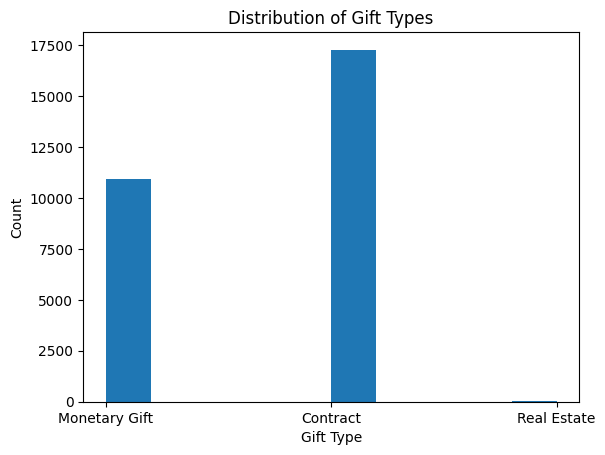

In [4]:
#q2.3
plt.hist(df['Gift Type'])
plt.xlabel('Gift Type')
plt.ylabel('Count')
plt.title('Distribution of Gift Types')
plt.show()

Most of the gift was contract gift type, followed by monetary gift. Very little was actualyl real estate gift. 

c:\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


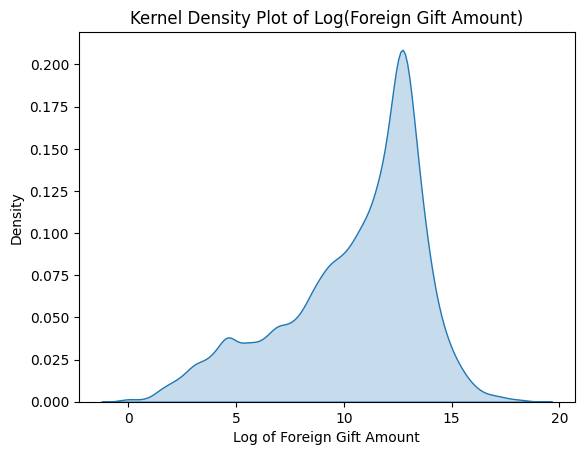

In [6]:
#2.4
import numpy as np

df['log_amount'] = np.log(df['Foreign Gift Amount'])

sns.kdeplot(df['log_amount'], fill=True)
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Log(Foreign Gift Amount)')
plt.show()


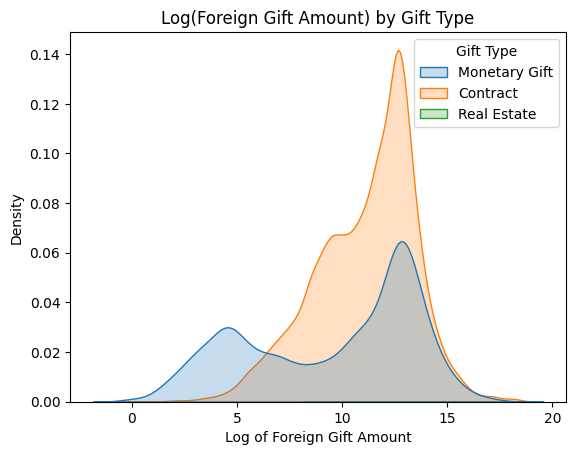

In [7]:
sns.kdeplot(data=df, x='log_amount', hue='Gift Type', fill=True)
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Log(Foreign Gift Amount) by Gift Type')
plt.show()

looks pretty log normal

In [9]:
#2.5
count15 = df.groupby('Country of Giftor').size().sort_values(ascending=False).head(15)
print("top 15 for number of gift")
print(count15)

top 15 for number of gift
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64


In [10]:
amountgive15 = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("top 15 for amount given")
print(amountgive15)

top 15 for amount given
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


In [11]:
#2.6
top15ins = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("Top 15 Institutions")
print(top15ins)

Top 15 Institutions
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


In [12]:
#2.7
whale = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print("Top Giftors")
print(whale)

Top Giftors
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [20]:
#3.1
df = pd.read_csv('./data/airbnb_hw.csv')

In [14]:
#3.2
print(f"Dimensions: {df.shape}")
print(f"some observation: {df.shape[0]}")
print(f"var name: {df.shape[1]}")

Dimensions: (30478, 13)
some observation: 30478
var name: 13


In [15]:
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  object 
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(3), object

In [17]:
#3.3
pd.crosstab(df['Property Type'], df['Room Type'])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


There's a lot of apartment, house, loft, or townhouse for renting, with the majority of them being a private room

In [ ]:
#3.4
df['Price'].describe()

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64

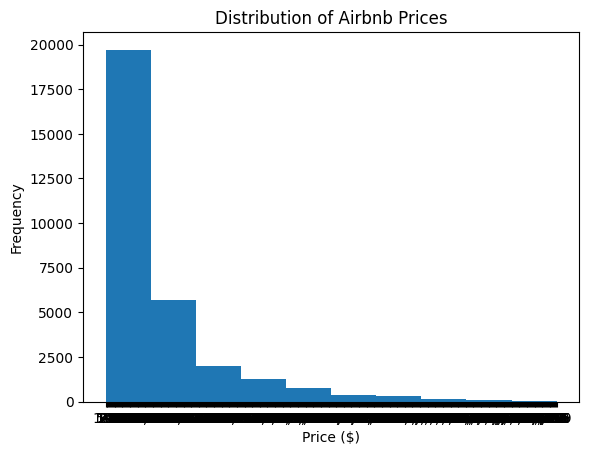

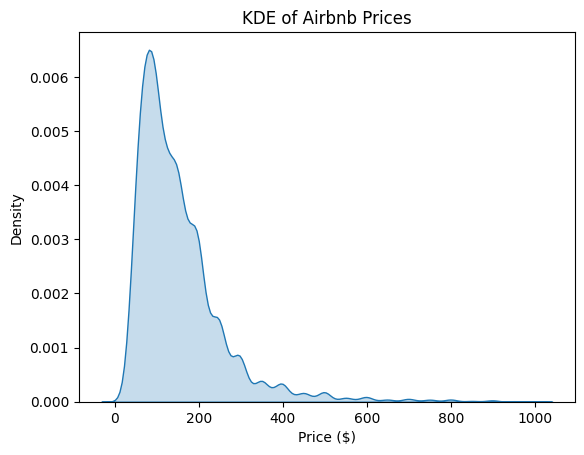

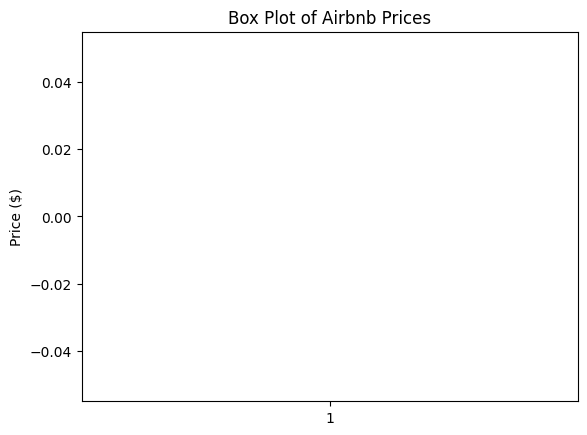

In [ ]:

plt.hist(df['Price'])
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Prices')
plt.show()


df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
sns.kdeplot(df['Price'], fill=True)
plt.xlabel('Price ($)')
plt.title('KDE of Airbnb Prices')
plt.show()

plt.boxplot(df['Price'])
plt.ylabel('Price ($)')
plt.title('Box Plot of Airbnb Prices')
plt.show()


In [26]:
df['price_log'] = np.log(df['Price'])
df['price_log'].describe()

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64

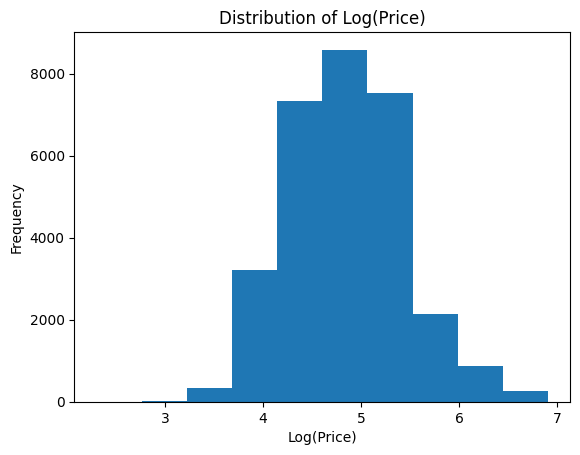

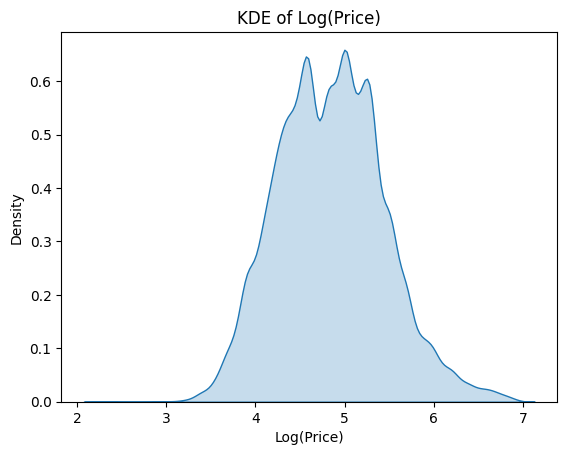

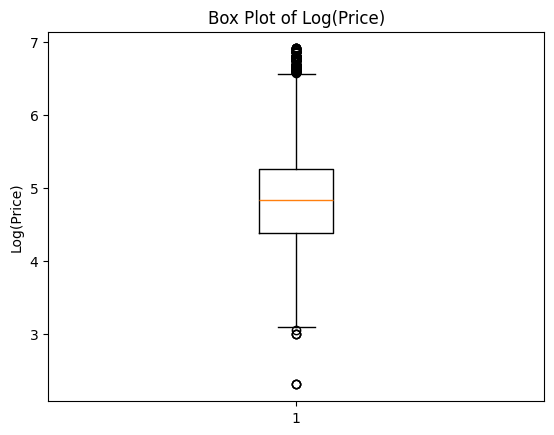

In [ ]:
plt.hist(df['price_log'].dropna())
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.title('Distribution of Log(Price)')
plt.show()

sns.kdeplot(df['price_log'].dropna(), fill=True)
plt.xlabel('Log(Price)')
plt.title('KDE of Log(Price)')
plt.show()

plt.boxplot(df['price_log'].dropna())
plt.ylabel('Log(Price)')
plt.title('Box Plot of Log(Price)')
plt.show()


the data didn't scale well if the mean is 153 and the max is 999, standard deviation is 100 too which is pretty high.

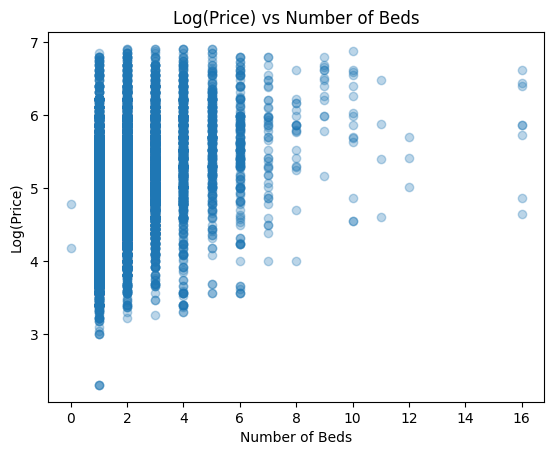

In [27]:
#3.5
plt.scatter(df['Beds'], df['price_log'], alpha=0.3)
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.title('Log(Price) vs Number of Beds')
plt.show()

In [28]:
df.groupby('Beds')['Price'].describe()


,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0


AS the number of bed goes up, the mean goes up and the standard deviation in price also increase

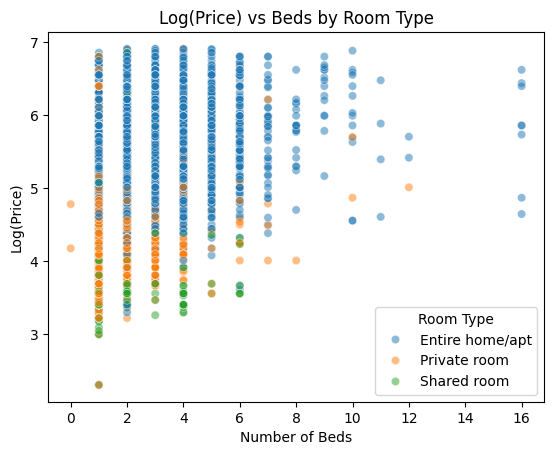

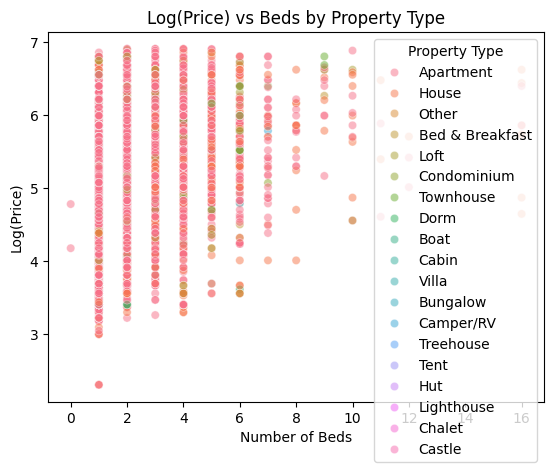

In [29]:
#3.6
sns.scatterplot(data=df, x='Beds', y='price_log', hue='Room Type', alpha=0.5)
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.title('Log(Price) vs Beds by Room Type')
plt.show()

sns.scatterplot(data=df, x='Beds', y='price_log', hue='Property Type', alpha=0.5)
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.title('Log(Price) vs Beds by Property Type')
plt.show()


In [30]:
df.groupby('Room Type')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Room Type,,,,,,,,
Entire home/apt,16855.0,204.061525,116.531136,10.0,135.0,175.0,239.0,999.0
Private room,12599.0,90.663227,47.914195,10.0,65.0,80.0,100.0,999.0
Shared room,843.0,76.553974,65.756210,10.0,45.0,60.0,85.0,950.0


In [31]:
df.groupby('Property Type')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Property Type,,,,,,,,
Apartment,26975.0,153.863170,104.112805,10.0,85.00,129.0,195.00,999.0
Bed & Breakfast,180.0,106.572222,84.701977,30.0,65.00,87.5,125.00,900.0
Boat,8.0,153.625000,49.231051,100.0,120.00,137.5,178.50,250.0
Bungalow,4.0,150.750000,46.464144,87.0,133.50,160.5,177.75,195.0
Cabin,2.0,165.000000,120.208153,80.0,122.50,165.0,207.50,250.0
Camper/RV,7.0,103.571429,102.343958,39.0,47.00,49.0,109.00,325.0
Castle,1.0,150.000000,NaN,150.0,150.00,150.0,150.00,150.0
Chalet,1.0,99.000000,NaN,99.0,99.00,99.0,99.00,99.0
Condominium,93.0,237.946237,172.754121,46.0,130.00,175.0,295.00,850.0


Home and apartment has highest average price at around 204 for property type its condo with 237 average price. For highest standard deviation, entire home and apartment for 116, and condominium for 172.25. Median is more reiable because it's more the cost of what the average people pay, the mean is a little high if you look at the max of 999 for examples. 

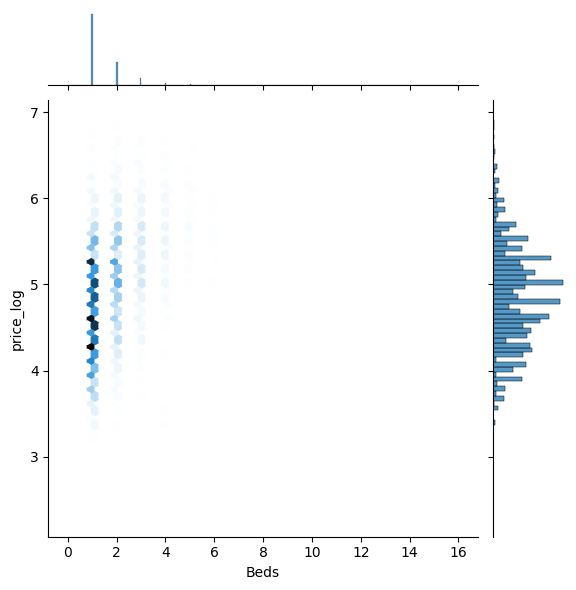

In [32]:
#3.7
sns.jointplot(data=df, x='Beds', y='price_log', kind='hex')
plt.show()

most of the listing was with 1-3 beds which could make my note about number of beds misleading.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [33]:
#4.1 
df = pd.read_csv('./data/drilling_rigs.csv')
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")

Observations: 623
Variables: 10


In [35]:
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Month                                                                                        623 non-null    object
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64 
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64 
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object
 5   Crude Oil and Natural Gas Rotary Rigs in Op

In [36]:
df.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


Some of these variables are listed as Not Available and is typed as an Object, we would want it as NAN if we want to do some analysis. so would need to be coerced to numeric, month would need to be converted to another type to like datetime.

In [37]:
#4.2
df['time'] = pd.to_datetime(df['Month'], format='mixed')
df[['Month', 'time']].head()


,Month,time
0,1973 January,1973-01-01
1,1973 February,1973-02-01
2,1973 March,1973-03-01
3,1973 April,1973-04-01
4,1973 May,1973-05-01


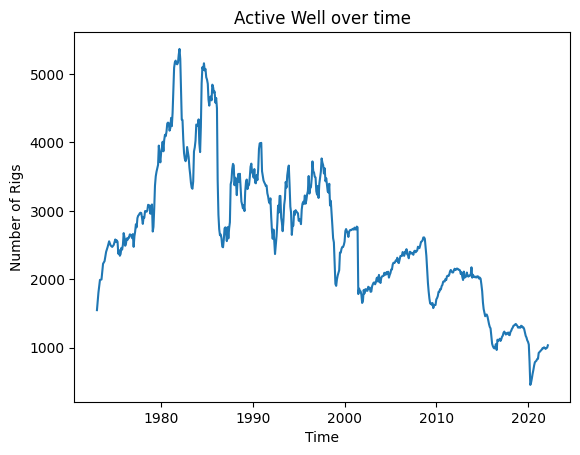

In [39]:
#4.3
df['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(
    df['Active Well Service Rig Count (Number of Rigs)'], errors='coerce'
)
plt.plot(df['time'], df['Active Well Service Rig Count (Number of Rigs)'])
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.title('Active Well over time')
plt.show()


Seems like the number of active wells are decreasing as time goes on

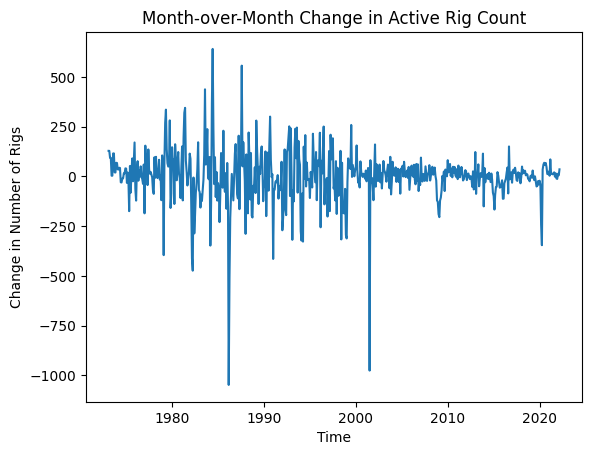

In [ ]:
#4.4
df['rig_diff'] = df['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.plot(df['time'], df['rig_diff'])
plt.xlabel('Time')
plt.ylabel('Change in Number of Rigs')
plt.title('Month-over-Month Change in Active Rig Count')
plt.show()

sometimes in 1986 and 2004 it's was extremely volatile, with a huge number of drops. 

In [41]:
#4.5
df["Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)"] = pd.to_numeric(df["Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)"], errors='coerce')
df["Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"] = pd.to_numeric(df["Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"], errors='coerce')
df["Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)"] = pd.to_numeric(df["Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)"], errors='coerce')
df["Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"] = pd.to_numeric(df["Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"], errors='coerce')

In [42]:
df_melted = df.melt(
    id_vars=['time'], 
    value_vars=["Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)", "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"],
    var_name='Rig Type', 
    value_name='Number of Rigs'
)

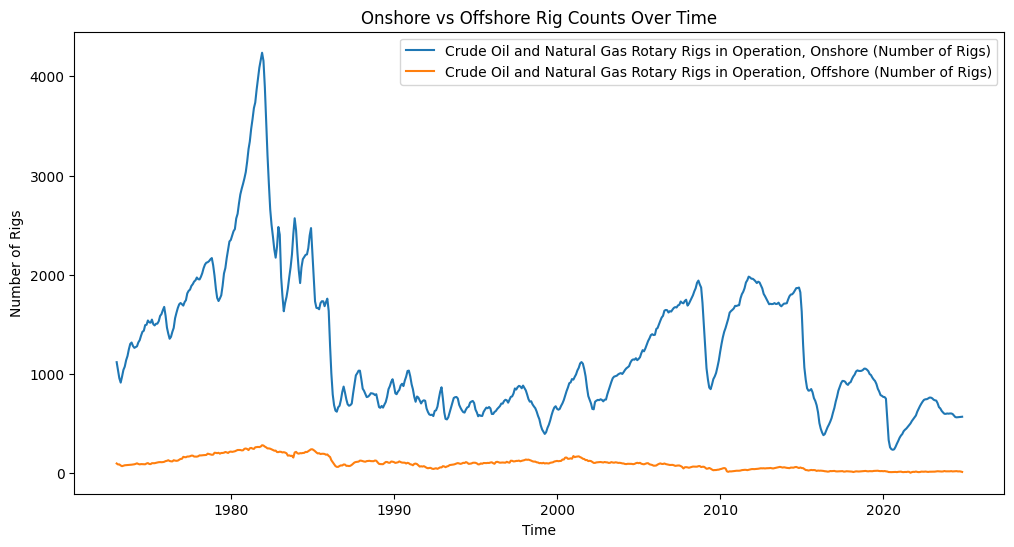

In [43]:
#asked chat for help with this part
plt.figure(figsize=(12, 6))
for rig_type in ['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)']:
    subset = df_melted[df_melted['Rig Type'] == rig_type]
    plt.plot(subset['time'], subset['Number of Rigs'], label=rig_type)
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.title('Onshore vs Offshore Rig Counts Over Time')
plt.legend()
plt.show()